In [8]:
import pandas as pd
import numpy as np 
import geopandas 
import matplotlib.pyplot as plt           
import pandas as pd     
import json 
import requests
import overpy
from tqdm import tqdm
from multiprocessing.dummy import Pool

In [9]:
Cali = geopandas.read_file('databases_and_shapefiles/Barrios Cali.zip')
Cali = Cali.to_crs(epsg=4326)

In [10]:
Cali

,ID_BARRIO,COD_BARRIO,COD_COMUNA,NOMBRE,ESTRATO_MO,geometry
0,610.0,0610,06,Ciudadela Floralia,2.0,"POLYGON ((-76.48753 3.49817, -76.48606 3.49757..."
1,219.0,0219,02,Brisas de Los Alamos,3.0,"POLYGON ((-76.49736 3.49770, -76.49744 3.49760..."
2,216.0,0216,02,Menga,6.0,"POLYGON ((-76.52829 3.49742, -76.52819 3.49741..."
3,603.0,0603,06,Paso del Comercio,2.0,"POLYGON ((-76.48674 3.49618, -76.48654 3.49645..."
4,608.0,0608,06,Los Guaduales,3.0,"POLYGON ((-76.49824 3.49476, -76.49792 3.49457..."
...,...,...,...,...,...,...
333,2299.0,2299,22,Club Campestre,6.0,"POLYGON ((-76.54230 3.37539, -76.54229 3.37540..."
334,2298.0,2298,22,Ciudad Campestre,6.0,"POLYGON ((-76.53706 3.37111, -76.53706 3.37111..."
335,2201.0,2201,22,Urb. Ciudad Jardin,6.0,"POLYGON ((-76.53706 3.37111, -76.53514 3.37014..."
336,2297.0,2297,22,Urb. Rio Lili,6.0,"POLYGON ((-76.52973 3.36728, -76.52934 3.36705..."


<AxesSubplot:>

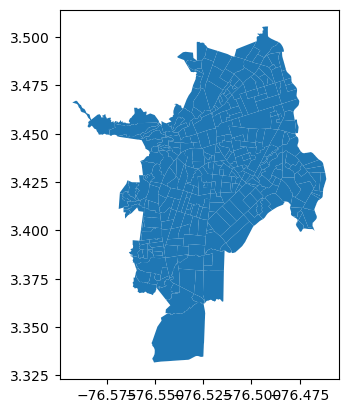

In [11]:
Cali.plot()

In [12]:
Covid_cali = pd.read_excel('databases_and_shapefiles/Datos de covid georeferenciados en Cali para 28.06.2021.xlsx',
                           sheet_name='Hoja1')
Covid_cali

,bar_ver_,dir_res_,Comorbilidades,asma,epoc,diabetes,vih,enf_card,cancer,desnutricion,obesidad,ins_renal,otr_medinm,fumador,tuberculos,HTA,HipoT,Recuperado definitivo,Latitud,Longitud
0,sin dato,timba jamundi,si,0,0,1,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.12224,-76.62251
1,sin dato,vereda chagres jamundi,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fallecido,3.12588,-76.60555
2,sin dato,robles puerta,si,0,0,0,0,0,0,0,0,0,0,1,0,0,0,recuperado,3.12843,-76.59343
3,sin dato,villa paz coregimiento de jamundi,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.13414,-76.54299
4,sin dato,corregimiento villa colombia jamundi,si,0,0,0,0,0,0,0,0,0,0,0,0,1,0,recuperado,3.18573,-76.67447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208805,lleras restrepo,lleras,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.58779,-76.49190
208806,sin dato,vive en las vegas,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.58792,-76.49861
208807,sin dato,las vegas dapa,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.58792,-76.49861
208808,valle del lili- parcelaciones,dapa alto sector de las vegas,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,recuperado,3.58792,-76.49861


In [13]:
Covid_cali = geopandas.GeoDataFrame(Covid_cali, geometry=geopandas.points_from_xy(Covid_cali.Longitud, 
                                                                                  Covid_cali.Latitud))
Covid_cali = Covid_cali.set_crs(epsg=4326, inplace=True, allow_override=True)
Covid_cali

,bar_ver_,dir_res_,Comorbilidades,asma,epoc,diabetes,vih,enf_card,cancer,desnutricion,...,ins_renal,otr_medinm,fumador,tuberculos,HTA,HipoT,Recuperado definitivo,Latitud,Longitud,geometry
0,sin dato,timba jamundi,si,0,0,1,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.12224,-76.62251,POINT (-76.62251 3.12224)
1,sin dato,vereda chagres jamundi,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,fallecido,3.12588,-76.60555,POINT (-76.60555 3.12588)
2,sin dato,robles puerta,si,0,0,0,0,0,0,0,...,0,0,1,0,0,0,recuperado,3.12843,-76.59343,POINT (-76.59343 3.12843)
3,sin dato,villa paz coregimiento de jamundi,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.13414,-76.54299,POINT (-76.54299 3.13414)
4,sin dato,corregimiento villa colombia jamundi,si,0,0,0,0,0,0,0,...,0,0,0,0,1,0,recuperado,3.18573,-76.67447,POINT (-76.67447 3.18573)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208805,lleras restrepo,lleras,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.58779,-76.49190,POINT (-76.49190 3.58779)
208806,sin dato,vive en las vegas,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.58792,-76.49861,POINT (-76.49861 3.58792)
208807,sin dato,las vegas dapa,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.58792,-76.49861,POINT (-76.49861 3.58792)
208808,valle del lili- parcelaciones,dapa alto sector de las vegas,no,0,0,0,0,0,0,0,...,0,0,0,0,0,0,recuperado,3.58792,-76.49861,POINT (-76.49861 3.58792)


In [14]:
Covid19_Cali = geopandas.sjoin(Covid_cali, Cali, how="left", op="within")
#Covid19_Cali
Covid19_Cali1 = Covid19_Cali[Covid19_Cali['index_right'].isnull()==False]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [15]:
Covid19_Cali1

,bar_ver_,dir_res_,Comorbilidades,asma,epoc,diabetes,vih,enf_card,cancer,desnutricion,...,Recuperado definitivo,Latitud,Longitud,geometry,index_right,ID_BARRIO,COD_BARRIO,COD_COMUNA,NOMBRE,ESTRATO_MO
20951,pance,parcelaciones pance,no,0,0,0,0,0,0,0,...,recuperado,3.332572,-76.541714,POINT (-76.54171 3.33257),337.0,2296.0,2296,22,Parcelaciones Pance,6.0
20952,parcelaciones pance,parcelaciones pance,no,0,0,0,0,0,0,0,...,recuperado,3.332572,-76.541714,POINT (-76.54171 3.33257),337.0,2296.0,2296,22,Parcelaciones Pance,6.0
20953,parcelaciones pance,parcelaciones pance,si,0,0,0,0,0,0,0,...,recuperado,3.332572,-76.541714,POINT (-76.54171 3.33257),337.0,2296.0,2296,22,Parcelaciones Pance,6.0
20954,parcelaciones pance,parcelaciones pance,no,0,0,0,0,0,0,0,...,recuperado,3.332572,-76.541714,POINT (-76.54171 3.33257),337.0,2296.0,2296,22,Parcelaciones Pance,6.0
20955,parcelaciones pance,parcelaciones pance,no,0,0,0,0,0,0,0,...,recuperado,3.332572,-76.541714,POINT (-76.54171 3.33257),337.0,2296.0,2296,22,Parcelaciones Pance,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208644,ciudadela floralia,calle 18 #16-24,no,0,0,0,0,0,0,0,...,recuperado,3.501268,-76.494291,POINT (-76.49429 3.50127),0.0,610.0,0610,06,Ciudadela Floralia,2.0
208646,jarillon - malvinas - paso de,cll 84 # 4n - 38,no,0,0,0,0,0,0,0,...,recuperado,3.501449,-76.494428,POINT (-76.49443 3.50145),0.0,610.0,0610,06,Ciudadela Floralia,2.0
208648,sin dato,c 83f # 9bn 35,no,0,0,0,0,0,0,0,...,recuperado,3.501730,-76.494770,POINT (-76.49477 3.50173),0.0,610.0,0610,06,Ciudadela Floralia,2.0
208649,ciudadela floralia,carrera 9 norte 83f 45,si,0,0,0,0,0,0,0,...,recuperado,3.502070,-76.494170,POINT (-76.49417 3.50207),0.0,610.0,0610,06,Ciudadela Floralia,2.0


In [16]:
Comorbilidad = Covid19_Cali1[Covid19_Cali1['Comorbilidades']=='si'].groupby('NOMBRE').count()['Comorbilidades'].to_frame()
Diabetes = Covid19_Cali1[Covid19_Cali1['diabetes']==1].groupby('NOMBRE').count()['diabetes'].to_frame()
HTA = Covid19_Cali1[Covid19_Cali1['HTA']==1].groupby('NOMBRE').count()['HTA'].to_frame()
Fallecido = Covid19_Cali1[Covid19_Cali1['Recuperado definitivo']=='fallecido'].groupby('NOMBRE').count()['Recuperado definitivo'].to_frame()
Recuperado = Covid19_Cali1[Covid19_Cali1['Recuperado definitivo']=='recuperado'].groupby('NOMBRE').count()['Recuperado definitivo'].to_frame()

In [17]:
Comorbilidad = Comorbilidad.merge(Diabetes, left_on=Comorbilidad.index, right_on=Diabetes.index,how='left')
Comorbilidad = Comorbilidad.merge(HTA, left_on='key_0', right_on=HTA.index,how='left')
Comorbilidad

,key_0,Comorbilidades,diabetes,HTA
0,20 de Julio,37,8.0,13.0
1,3 de Julio,56,14.0,29.0
2,Acueducto San Antonio,20,3.0,10.0
3,Aguablanca,164,26.0,72.0
4,Aguacatal,94,15.0,39.0
...,...,...,...,...
332,Villamercedes I - Villa Luz - Las G,18,5.0,11.0
333,Villanueva,129,28.0,70.0
334,Vipasa,158,35.0,64.0
335,Vista Hermosa,79,10.0,34.0


In [18]:
Comorbilidad = Comorbilidad.merge(Fallecido, left_on='key_0', right_on=Fallecido.index,how='left')
Comorbilidad = Comorbilidad.merge(Recuperado, left_on='key_0', right_on=Recuperado.index,how='left')
Comorbilidad

,key_0,Comorbilidades,diabetes,HTA,Recuperado definitivo_x,Recuperado definitivo_y
0,20 de Julio,37,8.0,13.0,2.0,167
1,3 de Julio,56,14.0,29.0,12.0,294
2,Acueducto San Antonio,20,3.0,10.0,3.0,109
3,Aguablanca,164,26.0,72.0,25.0,765
4,Aguacatal,94,15.0,39.0,12.0,543
...,...,...,...,...,...,...
332,Villamercedes I - Villa Luz - Las G,18,5.0,11.0,5.0,73
333,Villanueva,129,28.0,70.0,8.0,331
334,Vipasa,158,35.0,64.0,30.0,553
335,Vista Hermosa,79,10.0,34.0,10.0,439


In [19]:
Covid_Cali_Cantidad = Covid19_Cali1.groupby('NOMBRE').agg({'index_right':'count'})
Covid_Cali_Cantidad

,index_right
NOMBRE,
20 de Julio,172
3 de Julio,323
Acueducto San Antonio,116
Aguablanca,818
Aguacatal,559
...,...
Villamercedes I - Villa Luz - Las G,79
Villanueva,347
Vipasa,591


In [20]:
Variables_salud = Comorbilidad.merge(Covid_Cali_Cantidad, left_on='key_0', right_on='NOMBRE',how='left')
Variables_salud

,key_0,Comorbilidades,diabetes,HTA,Recuperado definitivo_x,Recuperado definitivo_y,index_right
0,20 de Julio,37,8.0,13.0,2.0,167,172
1,3 de Julio,56,14.0,29.0,12.0,294,323
2,Acueducto San Antonio,20,3.0,10.0,3.0,109,116
3,Aguablanca,164,26.0,72.0,25.0,765,818
4,Aguacatal,94,15.0,39.0,12.0,543,559
...,...,...,...,...,...,...,...
332,Villamercedes I - Villa Luz - Las G,18,5.0,11.0,5.0,73,79
333,Villanueva,129,28.0,70.0,8.0,331,347
334,Vipasa,158,35.0,64.0,30.0,553,591
335,Vista Hermosa,79,10.0,34.0,10.0,439,457


In [21]:
Variables_salud.columns = ['NOMBRE', 'Comorbilidad', 'Diabetes', 'HTA', 'Muertos', 'Recuperados', 'Covid']
Variables_salud

,NOMBRE,Comorbilidad,Diabetes,HTA,Muertos,Recuperados,Covid
0,20 de Julio,37,8.0,13.0,2.0,167,172
1,3 de Julio,56,14.0,29.0,12.0,294,323
2,Acueducto San Antonio,20,3.0,10.0,3.0,109,116
3,Aguablanca,164,26.0,72.0,25.0,765,818
4,Aguacatal,94,15.0,39.0,12.0,543,559
...,...,...,...,...,...,...,...
332,Villamercedes I - Villa Luz - Las G,18,5.0,11.0,5.0,73,79
333,Villanueva,129,28.0,70.0,8.0,331,347
334,Vipasa,158,35.0,64.0,30.0,553,591
335,Vista Hermosa,79,10.0,34.0,10.0,439,457


<AxesSubplot:>

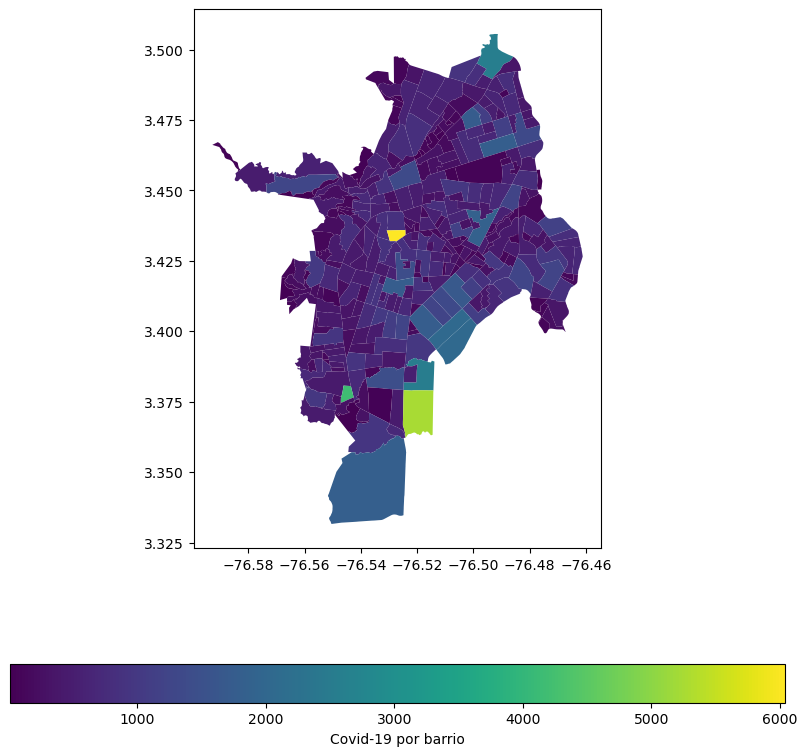

In [22]:
Covid_x_barrio = Cali.merge(Covid_Cali_Cantidad, left_on='NOMBRE', right_on=Covid_Cali_Cantidad.index,how='left')
Covid_x_barrio = Covid_x_barrio[['geometry','index_right','NOMBRE']]
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

Covid_x_barrio.plot(column='index_right',ax=ax,legend=True, legend_kwds={'label': "Covid-19 por barrio",
                                                                         'orientation': "horizontal"})

In [23]:
Covid_Cali_Cantidad.sort_values(by='index_right', ascending=False)

,index_right
NOMBRE,
Jun�n,6041
Lili,5246
Mel�ndez,4168
Ciudadela Floralia,2563
Caney,2541
...,...
Puerto Nuevo,25
Club Campestre,23
Sect. Bosque Municipal,23


In [24]:
Covid_Cali_Cantidad.sum() 

index_right    182625
dtype: int64

In [25]:
##### Para propósitos de análisis en la materia MAchine Learning 
Datos_CovidML = pd.read_excel('databases_and_shapefiles/Covid_19_espacial_machine_learning.xlsx')
Datos_CovidML.head()

,N,ID_BARRIO,Barrio_Urbanizacion_o_Sector,NOMBRE,Comuna,TGP = PEA/PET,TGI = PEI/PET,TD = Desocupados/PEA,TO = Ocupados/PET,TE = Ocupados/PEA,...,Tasa_ind_cobert_serv_bajo,Tasa_Pobre_nbi,Comorbilidad,Diabetes,HTA,Muertos,Recuperados,razon_letalidad,Covid,geometry
0,1,101,Terron Colorado,Terron Colorado,1,0.406665,0.182994,0.185587,0.331193,0.814413,...,0.240125,0.072224,230,56.0,83.0,51,1197,0.040865,1679,POLYGON ((-76.56995120093426 3.456430244134905...
1,2,102,Vista Hermosa,Vista Hermosa,1,0.390458,0.169281,0.178775,0.320654,0.821225,...,0.287637,0.098189,79,10.0,34.0,10,439,0.022272,614,POLYGON ((-76.57692380316878 3.458973625028077...
2,3,196,Sector Patio Bonito,Sect. Patio Bonito,1,0.371220,0.203902,0.203679,0.295610,0.796321,...,0.400932,0.157675,10,3.0,6.0,1,66,0.014925,123,"POLYGON ((-76.59073787613775 3.46718939421395,..."
3,4,199,Aguacatal,Aguacatal,1,0.380852,0.194102,0.200827,0.304367,0.799173,...,0.234079,0.090310,94,15.0,39.0,12,543,0.021622,733,"POLYGON ((-76.5591645462267 3.463446593644202,..."
4,5,201,Santa Rita,Santa Rita,2,NaN,NaN,NaN,NaN,NaN,...,0.055994,0.018139,26,4.0,12.0,0,121,0.000000,184,POLYGON ((-76.54810921072797 3.454631979818922...


In [26]:
Econ_Cali = pd.merge(Datos_CovidML, Variables_salud, on="NOMBRE")
Econ_Cali

,N,ID_BARRIO,Barrio_Urbanizacion_o_Sector,NOMBRE,Comuna,TGP = PEA/PET,TGI = PEI/PET,TD = Desocupados/PEA,TO = Ocupados/PET,TE = Ocupados/PEA,...,Recuperados_x,razon_letalidad,Covid_x,geometry,Comorbilidad_y,Diabetes_y,HTA_y,Muertos_y,Recuperados_y,Covid_y
0,1,101,Terron Colorado,Terron Colorado,1,0.406665,0.182994,0.185587,0.331193,0.814413,...,1197,0.040865,1679,POLYGON ((-76.56995120093426 3.456430244134905...,230,56.0,83.0,51.0,1197,1265
1,2,102,Vista Hermosa,Vista Hermosa,1,0.390458,0.169281,0.178775,0.320654,0.821225,...,439,0.022272,614,POLYGON ((-76.57692380316878 3.458973625028077...,79,10.0,34.0,10.0,439,457
2,3,196,Sector Patio Bonito,Sect. Patio Bonito,1,0.371220,0.203902,0.203679,0.295610,0.796321,...,66,0.014925,123,"POLYGON ((-76.59073787613775 3.46718939421395,...",10,3.0,6.0,1.0,66,73
3,4,199,Aguacatal,Aguacatal,1,0.380852,0.194102,0.200827,0.304367,0.799173,...,543,0.021622,733,"POLYGON ((-76.5591645462267 3.463446593644202,...",94,15.0,39.0,12.0,543,559
4,5,201,Santa Rita,Santa Rita,2,NaN,NaN,NaN,NaN,NaN,...,121,0.000000,184,POLYGON ((-76.54810921072797 3.454631979818922...,26,4.0,12.0,NaN,121,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,2201,Urbanizacion Ciudad Jardin,Urb. Ciudad Jardin,21,NaN,NaN,NaN,NaN,NaN,...,875,0.031008,844,"POLYGON ((-76.53706083204358 3.37110660760294,...",191,36.0,85.0,28.0,875,931
333,334,2296,Parcelaciones Pance,Parcelaciones Pance,22,0.396226,0.179245,0.190476,0.320755,0.809524,...,1755,0.012936,1282,POLYGON ((-76.52755986680749 3.362999117367949...,297,47.0,116.0,23.0,1755,1806
334,335,2297,Urbanización Río Lili,Urb. Rio Lili,22,0.424632,0.174632,0.112554,0.376838,0.887446,...,660,0.009009,561,POLYGON ((-76.52972746439929 3.367275198135529...,91,15.0,35.0,6.0,660,685
335,339,2298,Ciudad Campestre,Ciudad Campestre,22,NaN,NaN,NaN,NaN,NaN,...,286,0.020548,286,POLYGON ((-76.53706453754501 3.371108479961668...,67,11.0,26.0,6.0,286,303


In [ ]:
#Econ_Cali.to_excel('Covid_19_espacial_machine_learning.xlsx')